In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [45]:
print(df_train["Transported"].value_counts())

True     4378
False    4315
Name: Transported, dtype: int64


In [51]:
for column in df_train.columns:
    print(column,'\n', df_train[column].value_counts())

PassengerId 
 0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
HomePlanet 
 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
CryoSleep 
 False    5439
True     3037
Name: CryoSleep, dtype: int64
Cabin 
 G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
Destination 
 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
Age 
 24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64
VIP 
 False    8291
True      199
Name: VIP, dtype: int64
RoomService 
 0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
   

In [54]:
#cabin try to categorize using regex
# shoppingMall, FooCourt, Roomservice share pattern about 5000 did not used it
# ignore nan  - using XG boost
# HomePlanet and Cryosleep OHE 

In [56]:
# basic analysis Age, infints seems to have realy high survival rate, bining in 2 groups kids, adults
# posible age recovery: VIP
#False    28.639611
#True     37.449495
#Name: Age, dtype: float64

<AxesSubplot: xlabel='Age', ylabel='Count'>

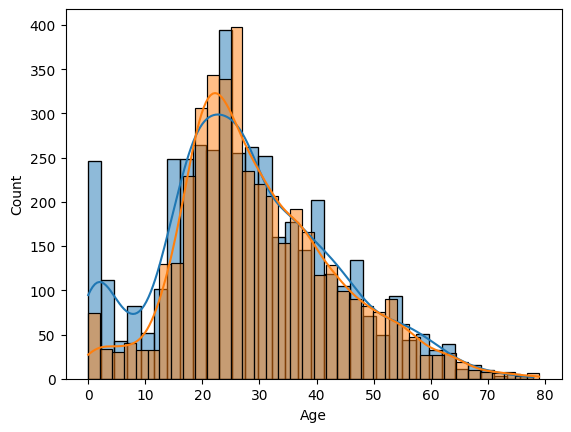

In [55]:
sns.histplot(df_train.query('Transported ==True')["Age"], kde=True, common_bins=True)
sns.histplot(df_train.query('Transported ==False')["Age"], kde=True, common_bins=True)
#sns.histplot(df_train["Age"], kde=True)

<AxesSubplot: xlabel='Age', ylabel='Count'>

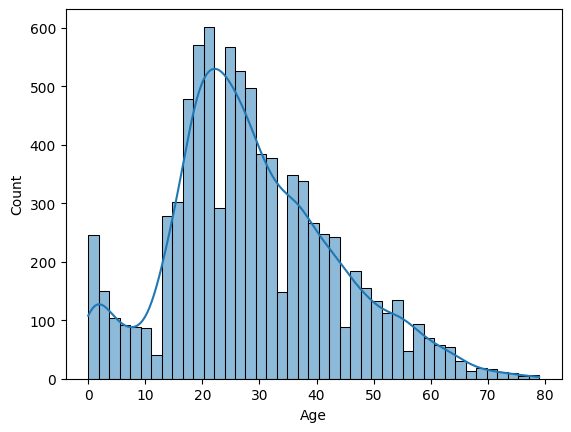

In [32]:
sns.histplot(df_train["Age"], kde=True)

In [37]:
df_train.corr()

/tmp/ipykernel_32005/299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [57]:
df_train.groupby(["HomePlanet", ])["Transported"].value_counts()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: Transported, dtype: int64

In [ ]:
#Dealing with 'RoomService' , 'FoodCourt', 'ShoppingMall', 'Spa'

In [4]:
df_train["TotalSpendings"] = df_train[['RoomService' , 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]].sum(axis=1)

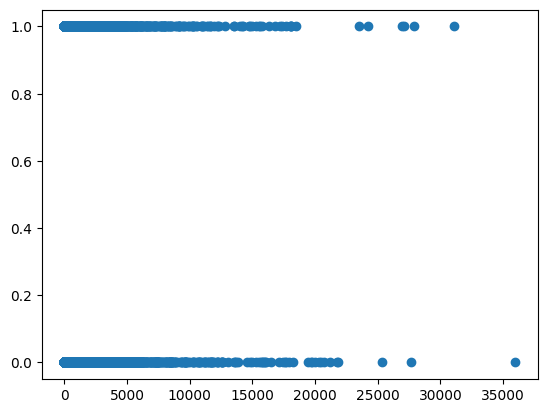

In [70]:
plt.scatter(df_train['TotalSpendings'], df_train['Transported'])

In [5]:
df_train.query('TotalSpendings == 0')["Transported"].value_counts()

True     2873
False     780
Name: Transported, dtype: int64

In [99]:
df_train.query('TotalSpendings > 1142')["Transported"].value_counts()

False    1518
True      753
Name: Transported, dtype: int64

In [40]:
df_train.query('FoodCourt == 0 & Spa == 0')["Transported"].mean()

0.6896793821670957

In [100]:
df_train.query('RoomService > 224')["Transported"].value_counts()

False    1318
True      291
Name: Transported, dtype: int64

In [105]:
df_train.query('RoomService > 0')["Transported"].value_counts()

False    2172
True      763
Name: Transported, dtype: int64

In [39]:
df_train.query('VRDeck > 0')["Transported"].mean()

0.27541528239202656

In [104]:
df_train.query('RoomService > 0 & RoomService < 224')["Transported"].value_counts()

False    852
True     472
Name: Transported, dtype: int64

In [96]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpendings
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1142.604509
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2327.986241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,420.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1193.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35970.000000


In [6]:
# binning this list into spent and did not spent
lst_expanses = ['RoomService' , 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Spa','TotalSpendings']
bins = [-np.inf, 0, np.inf]
labels = ['no_spent', 'spent']

In [67]:
for column in lst_expanses:
    df_train[f'{column}_bins'] = pd.cut(df_train[column], bins=bins, labels = [f'{column}_no_sp', f'{column}_sp']) 

In [101]:
#binning the age category

df_train["Age_bins"] = pd.cut(df_train['Age'], bins = [0,10,20,60,np.inf], labels=['kids','young_adults', 'adults', "old"])

In [10]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,TotalSpendings,RoomService_bins,FoodCourt_bins,ShoppingMall_bins,VRDeck_bins,Spa_bins,TotalSpendings_bins,Age_bins
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0.0,no_spent,no_spent,no_spent,no_spent,no_spent,no_spent,adults
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,736.0,spent,spent,spent,spent,spent,spent,adults
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,10383.0,spent,spent,no_spent,spent,spent,spent,adults
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,5176.0,no_spent,spent,spent,spent,spent,spent,adults
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,1091.0,spent,spent,spent,spent,spent,spent,adults


In [14]:
#evaluating the 'Cabin' column

 = df_train['Cabin'].str.split('/')

In [35]:
df_train.groupby([df_train['Cabin'].map(lambda x: x[2] if type(x)==list else x), df_train['Cabin'].map(lambda x: x[0] if type(x)==list else x)])['Transported'].mean()

Cabin  Cabin
P      A        0.435897
       B        0.674221
       C        0.580645
       D        0.403226
       E        0.342657
       F        0.410987
       G        0.448276
       T        0.250000
S      A        0.546763
       B        0.784038
       C        0.763547
       D        0.465217
       E        0.371365
       F        0.470501
       G        0.583788
       T        0.000000
Name: Transported, dtype: float64

In [43]:
df_train.groupby([df_train['Cabin'].map(lambda x: x[0] if type(x)==list else x)])['Transported'].value_counts() 
#it seems that cabins starting with B and C have lower chance of transportation, lits create categorical value for these

Cabin  Transported
A      False           129
       True            127
B      True            572
       False           207
C      True            508
       False           239
D      False           271
       True            207
E      False           563
       True            313
F      False          1565
       True           1229
G      True           1321
       False          1238
T      False             4
       True              1
Name: Transported, dtype: int64

In [133]:
lst_cabins = df_train['Cabin'].map(lambda x: x[0] if type(x)==list else x).unique().tolist()

In [134]:
for cabin in lst_cabins:
    df_train[f"Cabin_{cabin}"] = (df_train["Cabin"].map(lambda x: x[0] if type(x)==list else x) == cabin).astype('int')

In [62]:
#it seems that cabins starting with B and C have lower chance of transportation, lits create categorical value for these
#df_train["Cabin_B"] = (df_train["Cabin"].map(lambda x: x[0] if type(x)==list else x) == 'B').astype('int')
#df_train["Cabin_C"] = (df_train["Cabin"].map(lambda x: x[0] if type(x)==list else x) == 'C').astype('int')

In [64]:
df_train.groupby("VIP")['Transported'].value_counts() #VIP does not provide any significant insights

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: Transported, dtype: int64

In [168]:
#Understanding NAN

In [183]:
filter = df_train['Age'].isna()

In [184]:
df_train.loc[filter, 'Transported'].value_counts()

True     90
False    89
Name: Transported, dtype: int64

In [188]:
df_train.isna().any(axis=1).sum()
# a lot of rows missing values lets check if model performs better without nans

2227

In [65]:
### Feature selection
pd.set_option('display.max_columns', None)

In [135]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpendings,RoomService_bins,FoodCourt_bins,ShoppingMall_bins,VRDeck_bins,Spa_bins,TotalSpendings_bins,Age_bins,Cabin_B,Cabin_C,Cabin_F,Cabin_A,Cabin_G,Cabin_nan,Cabin_E,Cabin_D,Cabin_T
0,0001_01,Europa,False,"[B, 0, P]",TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,RoomService_no_sp,FoodCourt_no_sp,ShoppingMall_no_sp,VRDeck_no_sp,Spa_no_sp,TotalSpendings_no_sp,adults,1,0,0,0,0,0,0,0,0
1,0002_01,Earth,False,"[F, 0, S]",TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,RoomService_sp,FoodCourt_sp,ShoppingMall_sp,VRDeck_sp,Spa_sp,TotalSpendings_sp,adults,0,0,1,0,0,0,0,0,0
2,0003_01,Europa,False,"[A, 0, S]",TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,RoomService_sp,FoodCourt_sp,ShoppingMall_no_sp,VRDeck_sp,Spa_sp,TotalSpendings_sp,adults,0,0,0,1,0,0,0,0,0
3,0003_02,Europa,False,"[A, 0, S]",TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,RoomService_no_sp,FoodCourt_sp,ShoppingMall_sp,VRDeck_sp,Spa_sp,TotalSpendings_sp,adults,0,0,0,1,0,0,0,0,0
4,0004_01,Earth,False,"[F, 1, S]",TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,RoomService_sp,FoodCourt_sp,ShoppingMall_sp,VRDeck_sp,Spa_sp,TotalSpendings_sp,young_adults,0,0,1,0,0,0,0,0,0


In [73]:
df_train.to_pickle('train_data_v1.pkl')

In [189]:
df_train_dropna = df_train.dropna()

In [191]:
features = ["HomePlanet", "CryoSleep", "Destination", "TotalSpendings_bins","Age_bins"] #"RoomService_bins","FoodCourt_bins","ShoppingMall_bins","VRDeck_bins", "Spa_bins", "VIP"
X = pd.get_dummies(df_train_dropna[features]).join(df_train_dropna[['Cabin_B', 'Cabin_C']])#,'Cabin_E', 'Cabin_T',Cabin_F', 'Cabin_A', 'Cabin_G', 'Cabin_nan', 'Cabin_D',
Y = df_train_dropna['Transported']

In [74]:
#Creating model with xgBoost

In [75]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [192]:
x_train, x_cv, y_train, y_cv = train_test_split(X,Y,test_size=0.20, random_state=1 )

In [193]:
x_train.shape

(5172, 16)

In [194]:
dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatrix(x_cv)

In [79]:
# grid search 

In [81]:
param_grid = {
    'max_depth':[3,4,5,6],
    'eval_metric':['auc', 'logloss', 'error@t'],
    'learning_rate': [0.1,0.3,0.5,1],
    'n_estimators':[10,15,20,50],
    'booster':['gbtree'],
    'objective': ['binary:logistic']
}
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

/home/siathor/Documents/01_DS_MOVIE/01_DS/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/siathor/Documents/01_DS_MOVIE/01_DS/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/siathor/Documents/01_DS_MOVIE/01_DS/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/siathor/Documents/01_DS_MOVIE/01_DS/lib/python3.10/site-packages/xgboost/sklearn.py", line 149

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'],
                         'eval_metric': ['auc', 'logloss', 'error@t'],
                         'learning_rate': [0.1, 0.3, 0.5, 1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 15, 20, 50],
                         'objective': ['binary:logistic']})

In [82]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'booster': 'gbtree', 'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'objective': 'binary:logistic'}


In [195]:
param = {'booster': 'gbtree', 'eval_metric': 'auc', 'learning_rate': 0.3, 'max_depth': 6, 'objective': 'binary:logistic'}#{"eval_metric":"auc", "objective": "binary:logistic"}
num_rounds = 10
model = xgb.train(param, dtrain, num_rounds)

In [196]:
preds = model.predict(dtest)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_cv, preds.round())
print(accuracy)

0.7542503863987635
